In [39]:
import random
import colorsys

from PIL import Image, ImageDraw, ImageFont, ImageFilter

from keyrover import *
from keyrover.effects import *

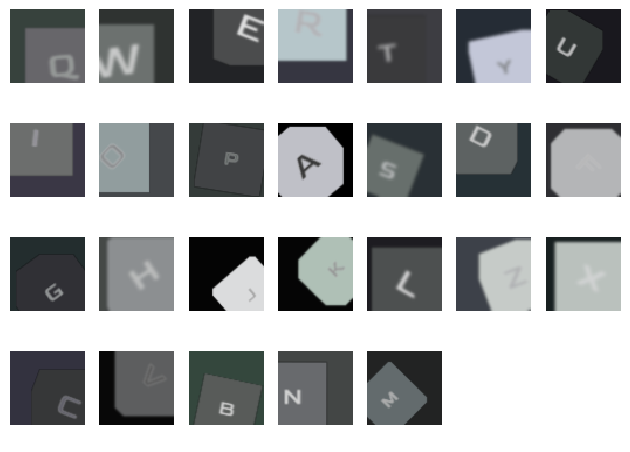

In [63]:
fonts = [ImageFont.truetype("assets/font/goldman/Goldman-Regular.ttf", size)
         for size in range(18, 28, 2)]

keys = []


def random_hsv(h_lims=(0, 1), s_lims=(0, 1), v_lims=(0, 1)):
    h = random.uniform(*h_lims)
    s = random.uniform(*s_lims)
    v = random.uniform(*v_lims)

    color = colorsys.hsv_to_rgb(h, s, v)
    return tuple(map(lambda c: int(c * 255), color))


def random_light_hsv():
    return random_hsv(h_lims=(0.4, 0.7), s_lims=(0.0, 0.1), v_lims=(0.2, 0.9))


def random_dark_hsv():
    return random_hsv(h_lims=(0.4, 0.7), s_lims=(0.0, 0.3), v_lims=(0.0, 0.3))


def random_grey(lims=(0, 255), alpha_lims=(0, 255)):
    c = random.randint(*lims)
    return c, c, c, random.randint(*alpha_lims)


for letter in "QWERTYUIOPASDFGHJKLZXCVBNM":
    img = Image.new("RGBA", (64, 64), color=random_light_hsv())
    key = Image.new("RGB", (64, 64), color=random_dark_hsv())

    draw = ImageDraw.Draw(img)

    fill = random_grey(lims=(200, 255), alpha_lims=(50, 255))
    draw.text((32, 32), letter, font=random.choice(fonts), anchor="mm", fill=fill)

    img = apply_random_affine(img, scale_lims=(0.75, 1.5), angle_lims=(-50, 50), translation_lims=(3, 3))
    
    img = img_to_PIL(img)
    key.paste(img, mask=img)
    
    key = key.filter(ImageFilter.GaussianBlur(radius=random.uniform(0, 1.5)))

    keys.append(key)

show_images(keys)